## Differential Splicing

([download link](https://oc-molgen.gnz.mpg.de/owncloud/s/gjG9EPiQwpRAyg3))

In [6]:
from isotools import Transcriptome
import matplotlib.pyplot as plt

path='demonstration_dataset'
isoseq=Transcriptome.load(f'{path}/PacBio_isotools_substantial_isotools.pkl')



SyntaxError: invalid syntax (4146330676.py, line 7)

In [2]:
#perform the test:
types_of_interest=['ES','ME','5AS','3AS','IR'] #ignore alternative TSS/PAS for now

diff_splice=isoseq.altsplice_test(isoseq.groups(), types=types_of_interest, min_total=200).sort_values('pvalue').reset_index()

sig=diff_splice.padj<.1
print(f'{sum(sig)} differential splice sites in {len(diff_splice.loc[sig,"gene"].unique())} genes for {" vs ".join(isoseq.groups())}')
diff_splice.head(10)

100%|██████████| 10803/10803 [00:07<00:00, 1510.38genes/s]

18 differential splice sites in 16 genes for GM12878 vs K562


,index,gene,gene_id,chrom,strand,start,end,splice_type,novel,padj,...,GM12878_b_GM12878_in_cov,GM12878_b_GM12878_total_cov,GM12878_c_GM12878_in_cov,GM12878_c_GM12878_total_cov,K562_a_K562_in_cov,K562_a_K562_total_cov,K562_b_K562_in_cov,K562_b_K562_total_cov,K562_c_K562_in_cov,K562_c_K562_total_cov
0,131,RIPK2,ENSG00000104312.8,chr8,+,89780160,89786592,ES,True,0.000177,...,218,220,224,225,34,104,41,153,34,111
1,22,ASAH1,ENSG00000104763.20,chr8,-,18067104,18067133,IR,True,0.007126,...,23,35,39,81,0,51,1,81,1,62
2,34,RECQL4,ENSG00000160957.15,chr8,-,144511789,144511910,5AS,False,0.007126,...,1,9,0,1,278,666,127,301,177,482
3,6,SNHG6,ENSG00000245910.9,chr8,-,66922392,66922613,IR,False,0.011708,...,13,45,21,82,1,70,3,72,1,91
4,71,SMIM19,ENSG00000176209.12,chr8,+,42541705,42546468,5AS,False,0.011708,...,2,48,0,68,26,43,38,63,25,44
5,44,NAPRT,ENSG00000147813.16,chr8,-,143575093,143575190,IR,False,0.011708,...,1,36,1,19,62,190,40,161,72,203
6,2,ZFAND1,ENSG00000104231.11,chr8,-,81715114,81718181,ES,False,0.031050,...,110,160,185,258,39,99,78,199,51,91
7,43,NAPRT,ENSG00000147813.16,chr8,-,143574900,143574985,IR,False,0.031235,...,1,33,0,21,52,194,29,161,61,208
8,14,PTK2B,ENSG00000120899.18,chr8,+,27444271,27450748,ES,False,0.031235,...,2,8,0,0,95,120,38,40,87,120
9,12,NCALD,ENSG00000104490.18,chr8,-,101719648,101915808,ES,False,0.032385,...,61,101,69,104,21,21,21,23,16,17


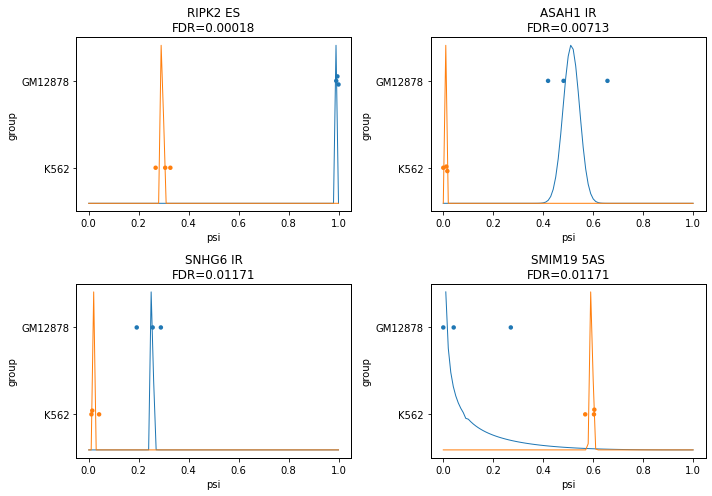

In [3]:
plt.rcParams["figure.figsize"] = (10,7)
from isotools.plots import plot_diff_results

f,axs,plotted=plot_diff_results(diff_splice, min_diff=.1, min_support=2,grid_shape=(2,2), group_colors=['C0','C1'])


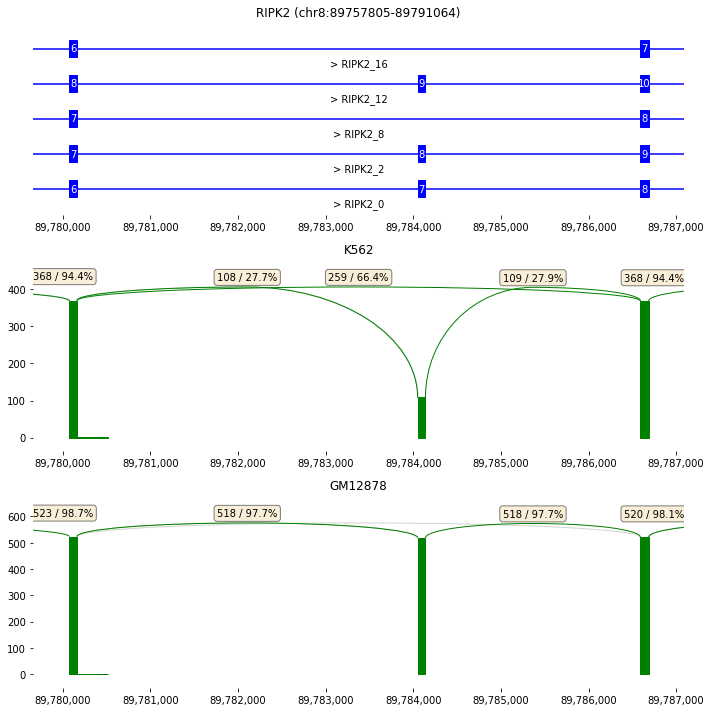

In [4]:
plt.rcParams["figure.figsize"] = (10,10)
pos=[89780160-500,89786592+500]
fig,axs=plt.subplots(3)
g=isoseq['RIPK2']
g.gene_track(x_range=pos, ax=axs[0], reference=False, select_transcripts=g.filter_transcripts('SUBSTANTIAL'))
g.sashimi_plot(samples=isoseq.groups()['K562'],x_range=pos, ax=axs[1], title='K562', log_y=False)
g.sashimi_plot(samples=isoseq.groups()['GM12878'],x_range=pos, ax=axs[2], title='GM12878', log_y=False)

fig.tight_layout()



In [5]:
isoseq.die_test(groups=isoseq.groups()).sort_values('pvalue').head(10)

100%|██████████| 10803/10803 [00:00<00:00, 15534.17genes/s]


,gene_id,gene_name,chrom,strand,start,end,padj,pvalue,deltaPI,transcript_ids
5982,ENSG00000070756.17,PABPC1,chr8,-,100685815,100722809,0.000000e+00,0.000000e+00,-0.289084,"[2, 1]"
5094,ENSG00000156482.11,RPL30,chr8,-,98024850,98046469,0.000000e+00,0.000000e+00,0.515042,"[3, 2]"
4805,ENSG00000161016.18,RPL8,chr8,-,144789764,144792587,0.000000e+00,0.000000e+00,-0.477042,"[2, 6]"
4632,ENSG00000164924.18,YWHAZ,chr8,-,100916522,100953388,0.000000e+00,0.000000e+00,0.303116,"[31, 11]"
4172,ENSG00000147604.14,RPL7,chr8,-,73290241,73295789,1.157393e-170,1.885004e-172,0.092221,"[2, 31]"
3235,ENSG00000104408.11,EIF3E,chr8,-,108162786,108443496,2.092139e-137,4.088872e-139,0.166874,"[0, 20]"
9988,ENSG00000104312.8,RIPK2,chr8,+,89757805,89791064,6.088181e-101,1.388185e-102,0.677697,"[2, 0]"
4239,ENSG00000129696.13,TTI2,chr8,-,33473385,33513185,9.366700e-100,2.440834e-101,-0.617118,"[3, 22]"
1369,ENSG00000147684.10,NDUFB9,chr8,+,124539100,124580648,4.019587e-89,1.178381e-90,0.399575,"[0, -1]"
1525,ENSG00000104320.15,NBN,chr8,-,89924514,90003228,5.103980e-88,1.662534e-89,-0.409024,"[2, 1]"
